<center>
    <h1><font color="blue">PreCud Quicklook</font></h1>
</center>

> This is to look at PreCud files and compare with CUD.
* Reading the files are taken from walkthrough or gen_cud


# <font color="blue">Imports

In [29]:
%matplotlib inline
import os
import math
import h5py
import numpy as np
from matplotlib import pyplot as plt
from importlib import reload

In [30]:
file_dict= {
    "r8_trk" :"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run8-2MeV/2022-04-26_1710_1651007468_2MeVBeam_1hour_run8_tracker_L3.h5",
    "r8_czt" :"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run8-2MeV/2022-04-26_CZT_run08-000_L0calv1.0_LTA_L1.h5",
    "r8_csi" :"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run8-2MeV/2022-04-26__17_08_38__ROSSPAD__raw_data_log.L3.h5",
    "r11_trk":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run11-2MeV/2022-04-26_2052_1651020748_2MeVBeam_1hour_run11_tracker_L3.h5",
    "r11_czt":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run11-2MeV/2022-04-26_CZT_run11_34-000_L0calv1.0_LTA_L1.h5",
    "r11_csi":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run11-2MeV/2022-04-26__20_49_54__ROSSPAD__raw_data_log.L3.h5",
    "r10_trk":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run10-2MeV/2022-04-26_1937_1651016255_2MeVBeam_1hour_run10_tracker_L3.h5",
    "r10_czt":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run10-2MeV/2022-04-26_CZT_run10_L0calv1.0_LTA_L1.h5",
    "r10_csi":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run10-2MeV/2022-04-26__19_34_44__ROSSPAD__raw_data_log.L3.h",
    "r10_csi_1s":"/Users/swasti/Library/CloudStorage/Box-Box/ComPair/Beamtest/Data_Files/run10-2MeV/CsI_1s_window/2022-04-26__19_34_44__ROSSPAD__raw_data_log_1s.L3.h5",

}

In [31]:
run = '11'
nrg = "2MeV"
trk_fname = file_dict[f'r{run}_trk']
czt_fname = file_dict[f'r{run}_czt']
csi_fname = file_dict[f'r{run}_csi']

trk_file = h5py.File(trk_fname,'r')
czt_file = h5py.File(czt_fname,'r')
csi_file = h5py.File(csi_fname,'r')

fpath = trk_fname[0:trk_fname.rfind('/')+1]
fpath

KeyboardInterrupt: 

# <font color="blue">Checking Attributes
    
> Attributes can be stored and individual levels. For tracker, its stored at root in L2 and much deeper in L3.

In [ ]:
dict(trk_file.attrs.items())

In [5]:
dict(czt_file.attrs.items())

{}

In [6]:
dict(csi_file.attrs.items())

{}

# <font color="blue"> Reading Data

## <font color="navy"> Tracker

* (10/19/22) This is still old format which will need to be updated. 

In [7]:
trk_file['tracker'].keys()

<KeysViewHDF5 ['energy', 'event_id', 'event_time', 'pulse_height']>

In [8]:
trk_file['tracker/energy']

<HDF5 dataset "energy": shape (467819, 10, 2, 192), type "<f8">

In [9]:
Trk_nrg = trk_file['tracker/energy'][...]
Trk_nrg_arr = Trk_nrg
Trk_nrg_sum_arr = Trk_nrg.sum(axis = tuple(range(1,4)) ) # Tracker nrg is doubled so look a the list.
Trk_nrg_arr.shape

(467819, 10, 2, 192)

In [10]:
trk_file['tracker/event_time']

<HDF5 dataset "event_time": shape (467819,), type "<u8">

## <font color="navy">CZT

In [11]:
czt_file['eventdata/czt'].keys()

<KeysViewHDF5 ['anode_digitime', 'anode_pulseheight', 'asic_temperature', 'cathode_digitime', 'cathode_pulseheight', 'energy', 'energy_unsupressed', 'event_id', 'event_time', 'pad_pulseheight', 'position', 'utc_corr']>

In [12]:
czt_file['eventdata/czt/energy']

<HDF5 dataset "energy": shape (469684, 16, 16), type "<f4">

In [13]:
Czt_nrg = czt_file['eventdata/czt/energy'][...]
Czt_nrg_arr = Czt_nrg
Czt_nrg_sum_arr= Czt_nrg.sum(axis = tuple(range(1,3)) )
Czt_nrg_arr.shape

(469684, 16, 16)

In [14]:
czt_file['eventdata/czt/utc_corr']

<HDF5 dataset "utc_corr": shape (469684,), type "<f8">

## <font color="navy">CsI

In [15]:
csi_file.keys()

<KeysViewHDF5 ['EventID', 'erg', 'pos', 'time', 'use_erg', 'use_pos']>

In [16]:
csi_file['erg/block0_values']

<HDF5 dataset "block0_values": shape (246046, 30), type "<f4">

In [17]:
Csi_nrg = csi_file['erg/block0_values'][...]
Csi_nrg_arr = Csi_nrg
Csi_nrg_sum_arr = Csi_nrg.sum(axis = tuple(range(1,2)) )
Csi_nrg_arr.shape

(246046, 30)

In [18]:
csi_file['time/UTC/values']

<HDF5 dataset "values": shape (246046,), type "<f8">

# <font color='blue'> Analysis and Plots

## <font color="navy"> Basic Filters and definitions

In [19]:
max_nrg_sel = 3500.0
Trk_nrg_thr = 0.0
Czt_nrg_thr = 0.0
Csi_nrg_thr = 0.0

Trk_nrg_max = max_nrg_sel
Czt_nrg_max = max_nrg_sel
Csi_nrg_max = max_nrg_sel
#n_evts

In [20]:
# Xlim
xlim_min = 0
xlim_max =  max_nrg_sel # KeV

## <font color='navy'> Histogram parameters

In [21]:
e_min = 10.0 
e_max = max_nrg_sel
bin_width = 10.00
n_bins = int((e_max-e_min)/bin_width)
n_bins

349

In [22]:
Trk_nrg_arr.shape

(467819, 10, 2, 192)

## <font color="navy">Energy Deposited in Each Sensor

In [24]:
Trk_nrg_list_ind = [] # individual!
Czt_nrg_list_ind = []
Csi_nrg_list_ind = []

counter1 = 0

# The N_Event is different for each of the sensors so we need to do this separately.

trk_nevt = Trk_nrg_arr.shape[0]
for i in range(trk_nevt):
    #Tracker
    temp_nrg_arr = Trk_nrg_arr[i][...]
    if (np.count_nonzero(temp_nrg_arr > 0.0)) :
        temp_arr = temp_nrg_arr[np.where(temp_nrg_arr>0.0)]
        #temp_arr = temp_arr/2.0 
        for j in range(0,len(temp_arr),2):
            # Tracker has average energy but twice in X and Y.
            Trk_nrg_list_ind.append(temp_arr[j])
            #if(temp_arr[j] > 1500):
                #print(i)
            
# CZT           
czt_nevt = Czt_nrg_arr.shape[0]
for i in range(czt_nevt):

    temp_nrg_arr = Czt_nrg_arr[i]
    if (np.count_nonzero(temp_nrg_arr > 0.0)) :
        temp_arr = temp_nrg_arr[np.where(temp_nrg_arr>0.0)]
        for j in range(len(temp_arr)):
            Czt_nrg_list_ind.append(temp_arr[j])

            
# CSI
csi_nevt = Csi_nrg_arr.shape[0]
for i in range(csi_nevt):
    temp_nrg_arr = Csi_nrg_arr[i]
    if (np.count_nonzero(temp_nrg_arr > 0.0)) :
        temp_arr = temp_nrg_arr[np.where(temp_nrg_arr>0.0)]
        for j in range(len(temp_arr)):
            Csi_nrg_list_ind.append(temp_arr[j])
 

### <font color='brown'>Plot : Energy Deposited in each Sensor

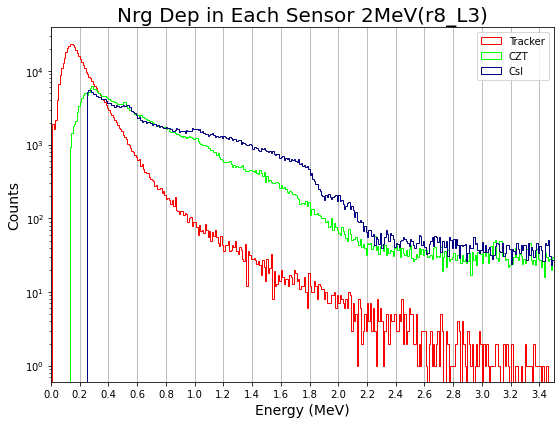

In [25]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list_ind)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='navy')

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel("Counts", size=14)
plt.title(f"Nrg Dep in Each Sensor {nrg}(r{run}_L3)", size = 20)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}L3_precud_NrgDep_Ind_{run}_{nrg}MeV_log.jpeg")

## <font color='navy'> Total Energy Deposited

In [26]:
Tot_nrg_list = []
#Tot_nrg_list_a = []
#Tot_nrg_list_b = []
#Tot_nrg_list_c = []

Trk_nrg_list = []
Czt_nrg_list = []
Csi_nrg_list = []

#counter1 = 0

# Tracker
trk_nevt = Trk_nrg_sum_arr.shape[0]
for i in range(trk_nevt):
    
    #Tracker
    temp_nrg = Trk_nrg_sum_arr[i]
    if temp_nrg > 0.0:
        temp_nrg = temp_nrg/2.0 
        Trk_nrg_list.append(temp_nrg)
        
# CZT           
czt_nevt = Czt_nrg_sum_arr.shape[0]
for i in range(czt_nevt):    
    temp_nrg = Czt_nrg_sum_arr[i]
    if temp_nrg > 0.0:
        temp_czt_tot = np.sum(temp_nrg)
        Czt_nrg_list.append(temp_czt_tot)
    
# CSI
csi_nevt = Csi_nrg_sum_arr.shape[0]
for i in range(csi_nevt):
    temp_nrg = Csi_nrg_sum_arr[i]
    if temp_nrg > 0.0:
        temp_csi_tot = np.sum(temp_nrg)
        Csi_nrg_list.append(temp_csi_tot)        


### <font color='brown'> Plot : Energy Deposited Total

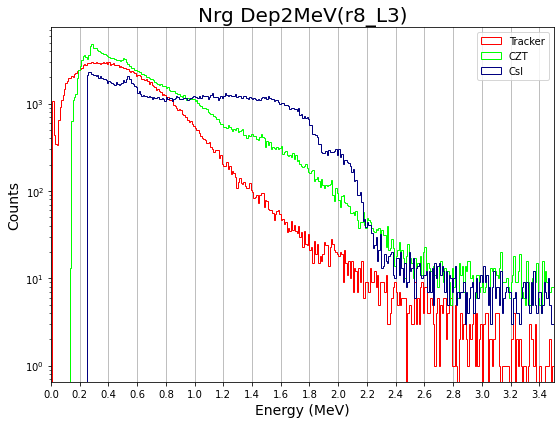

In [27]:
 
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='navy')

xvar = (a[0:-1])
tot_nrg_hist = trk_hist+czt_hist+csi_hist
#plt.step(xvar,tot_nrg_hist, label='Total')
#plt.hist(np.array(Tot_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step',label='Total', color='navy')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel("Counts", size=14)
plt.title(f"Nrg Dep{nrg}(r{run}_L3)", size = 20)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
plt.yscale('log')
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}L3_precud_NrgDep_{run}_{nrg}MeV_log.jpeg")

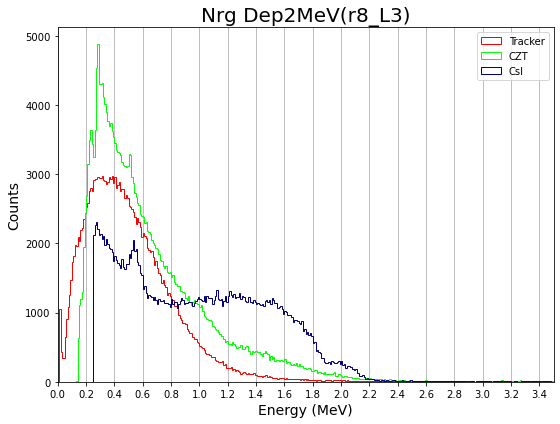

In [28]:
# Combined
plt=reload(plt)
plt.figure(figsize=(8,6))
trk_hist, a, b= plt.hist(np.array(Trk_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='Tracker', histtype = 'step',color='red')
czt_hist, a, b=plt.hist(np.array(Czt_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CZT', histtype = 'step', color='lime')
csi_hist, a, b= plt.hist(np.array(Csi_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0), label='CsI', histtype = 'step',color='navy')

#plt.hist(np.array(Tot_nrg_list)/1000.0, bins=n_bins, range=(e_min/1000.0, e_max/1000.0),histtype = 'step',label='Total', color='navy')

#test_t = trk_hist+czt_hist+csi_hist

plt.rcParams["figure.figsize"] = [6, 8]
plt.xlabel("Energy (MeV)", size=14)
plt.ylabel("Counts", size=14)
plt.title(f"Nrg Dep{nrg}(r{run}_L3)", size = 20)
plt.xlim(xlim_min/1000.0,xlim_max/1000.0)
#plt.ylim(0,2000)
plt.tight_layout()
plt.grid(axis = 'x')
plt.xticks(np.arange(0,xlim_max/1000.0,0.2))
plt.legend()
plt.savefig(f"{fpath}L3_precud_NrgDep_{run}_{nrg}MeV.jpeg")

# <font color='blue'>Investigate EventID and EventTime

## Event ID

### <font color='brown'> Plot: Event IDs all

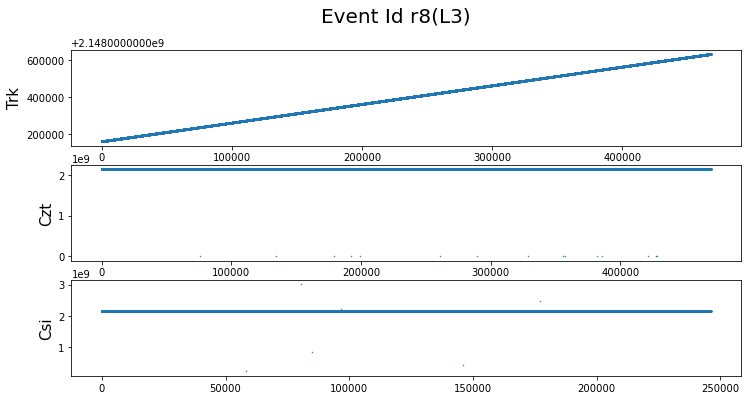

In [28]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

trk_id = trk_file['tracker/event_id'][...]
ax[0].scatter(np.arange(len(trk_id)),trk_id,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_id=czt_file["eventdata/czt/event_id"][...]
ax[1].scatter(np.arange(len(tczt_id)),tczt_id,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

tcsi_id = csi_file['EventID/EventID/values'][...]
ax[2].scatter(np.arange(len(tcsi_id)),tcsi_id,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.rcParams["figure.figsize"] = [12, 6]    

plt.suptitle(f'Event Id r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_EvtID_r{run}_{nrg}_e1.jpeg")


### <font color='brown'> Plot: Event IDs > 0

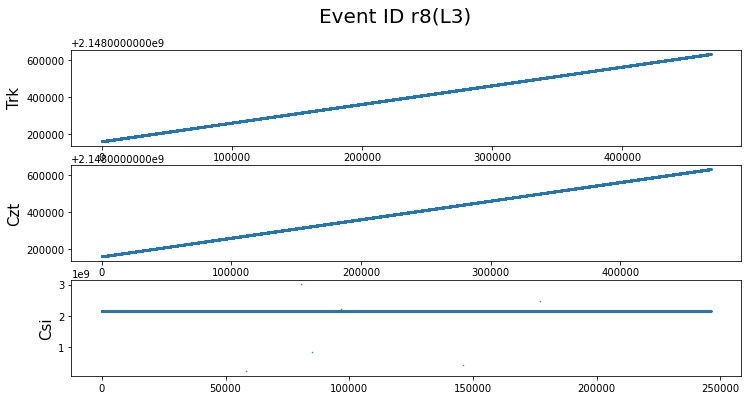

In [29]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

trk_id = trk_file['tracker/event_id'][...]
ax[0].scatter(np.arange(len(trk_id)),trk_id,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_id=czt_file["eventdata/czt/event_id"][...]
czt_id=tczt_id[np.where(tczt_id>0)]
ax[1].scatter(np.arange(len(czt_id)),czt_id,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

tcsi_id = csi_file['EventID/EventID/values'][...]
csi_id=tcsi_id[np.where(tcsi_id>0)]
ax[2].scatter(np.arange(len(csi_id)),csi_id,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')
    
plt.rcParams["figure.figsize"] = [12, 6]    

plt.suptitle(f'Event ID r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_EvtID_r{run}_{nrg}_e2.jpeg")

### <font color='brown'> Plot: Event IDs Cleaned

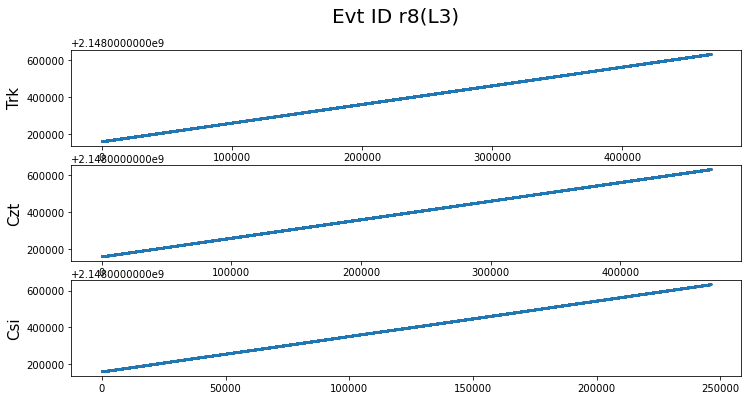

In [37]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

trk_id = trk_file['tracker/event_id'][...]
ax[0].scatter(np.arange(len(trk_id)),trk_id,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_id=czt_file["eventdata/czt/event_id"][...]
czt_id=tczt_id[np.where(tczt_id>0)]
ax[1].scatter(np.arange(len(czt_id)),czt_id,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')


tcsi_id = csi_file['EventID/EventID/values'][...]
csi_id_a= tcsi_id[np.where(tcsi_id>2E9)]
csi_id = csi_id_a[np.where(csi_id_a<2.15E9)]
ax[2].scatter(np.arange(len(csi_id)),csi_id,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.rcParams["figure.figsize"] = [12, 6]    
plt.suptitle(f'Evt ID r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_EvtID_r{run}_{nrg}_e3.jpeg")

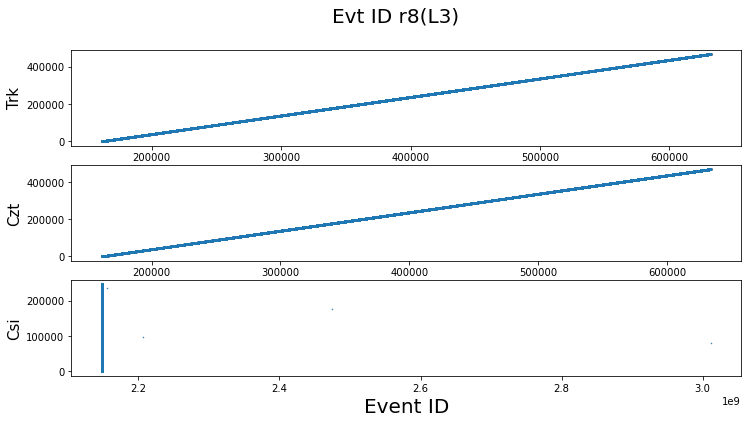

In [31]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

trk_id = trk_file['tracker/event_id'][...]
ax[0].scatter(trk_id,np.arange(len(trk_id)),marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_id=czt_file["eventdata/czt/event_id"][...]
czt_id=tczt_id[np.where(tczt_id>0)]
ax[1].scatter(czt_id,np.arange(len(czt_id)),marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')


tcsi_id = csi_file['EventID/EventID/values'][...]
csi_id=tcsi_id[np.where(tcsi_id>2E9)]
ax[2].scatter(csi_id,np.arange(len(csi_id)),marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.rcParams["figure.figsize"] = [12, 6]    
plt.suptitle(f'Evt ID r{run}(L3)', size=20)
plt.xlabel('Event ID',fontsize='20')
plt.savefig(f"{fpath}L3_precud_gen_scatter_EvtID_r{run}_{nrg}_e4.jpeg")

In [32]:
def get_common_index(trk_evtid, czt_evtid, csi_evtid):
    """ Find the common index using the event id from three subsystems.

    Parameters
    ----------
    trk_evtid : Dataset of Event IDs from tracker
    czt_evtid : Dataset of Event IDs from CZT
    csi_evtid :Dataset of Event IDs from CSI

    Returns
    -------
        trk_cm_index: Intarr
            Array of common index selection for tracker
        czt_cm_index: Intarr
            Array of common index selection for Czt
        csi_cm_index: Intarr
            Array of common index selection for Csi
    """
    delme1, tra_in1, csi_in1 = np.intersect1d(trk_evtid,csi_evtid,
                                              return_indices=True) # common index between tra and csi
    delme2, tra_in2, czt_in1 = np.intersect1d(trk_evtid,czt_evtid,
                                              return_indices=True) # common index between tra and czt
    delme3, csi_in2, czt_in2 = np.intersect1d(csi_evtid,czt_evtid,
                                              return_indices=True) # common index between czt and csi

    trk_cm_index, delme4, delme5 = np.intersect1d(tra_in1, tra_in2,
                                                  return_indices=True)  # get the ARRAY of common index.
    csi_cm_index, delme6, delme7 = np.intersect1d(csi_in1, csi_in2,
                                                  return_indices=True)  # get the ARRAY of common index.
    czt_cm_index, delme8, delme9 = np.intersect1d(czt_in1, czt_in2,
                                                  return_indices=True)  # get the ARRAY of common index.

    return trk_cm_index, czt_cm_index, csi_cm_index

### <font color='brown'> Plot: Common Event ID preview

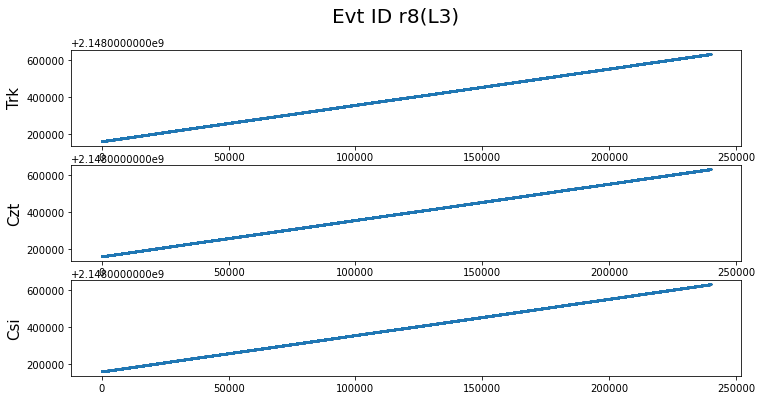

In [33]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

trk_evtid = trk_file['tracker/event_id'][...]
tczt_id=czt_file["eventdata/czt/event_id"][...]
czt_evtid=tczt_id[np.where(tczt_id>0)]
tcsi_id = csi_file['EventID/EventID/values'][...]
csi_evtid=tcsi_id[np.where(tcsi_id>0)]

trk_id_index, czt_id_index, csi_id_index = get_common_index(trk_evtid, czt_evtid, csi_evtid)

trk_id = trk_evtid[trk_id_index]
czt_id = czt_evtid[czt_id_index]
csi_id = csi_evtid[csi_id_index]

ax[0].scatter(np.arange(len(trk_id)),trk_id,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')


ax[1].scatter(np.arange(len(czt_id)),czt_id,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')


ax[2].scatter(np.arange(len(csi_id)),csi_id,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')
    
plt.rcParams["figure.figsize"] = [12, 6]    

plt.suptitle(f'Evt ID r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_EvtID_r{run}_{nrg}_e5.jpeg")

### <font color='brown'> Plot: Scatter Tot dep vs Evt ID

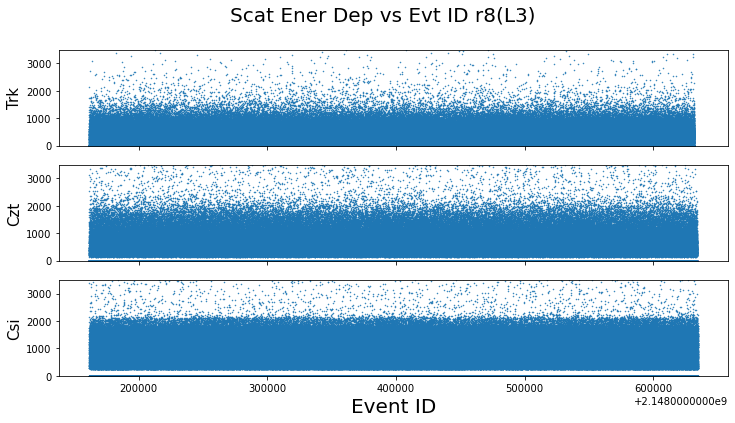

In [38]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3, sharex=True)

ttrk_id = trk_file['tracker/event_id'][...]
trk_id_ind = np.where(ttrk_id>0)
trk_id = ttrk_id[trk_id_ind]
Nrg_arr= Trk_nrg_sum_arr[trk_id_ind]

ax[0].scatter(trk_id,Nrg_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_id=czt_file["eventdata/czt/event_id"][...]
czt_id_ind = np.where(tczt_id>0)
czt_id = tczt_id[czt_id_ind]
Nrg_arr =Czt_nrg_sum_arr[czt_id_ind]
ax[1].scatter(czt_id,Nrg_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

tcsi_id = csi_file['EventID/EventID/values'][...]
csi_id_a= tcsi_id[np.where(tcsi_id>2E9)]
csi_id = csi_id_a[np.where(csi_id_a<2.15E9)]

Nrg_arr_a = Csi_nrg_sum_arr[np.where(tcsi_id>2E9)]
Nrg_arr = Nrg_arr_a[np.where(csi_id_a<2.15E9)]
ax[2].scatter(csi_id,Nrg_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')
#ax[2].set_xlim(2000765017,)

for axs in ax:
    axs.set_ylim(0,max_ener)
    #axs.set_xlim(10,)
    #axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
#lt.xlim(xmin,xmax)
    
plt.rcParams["figure.figsize"] = [12, 6]    
plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Scat Ener Dep vs Evt ID r{run}(L3)', size=20)

plt.savefig(f"{fpath}L3_precud_gen_scatter_r{run}_{nrg}_a.jpeg")

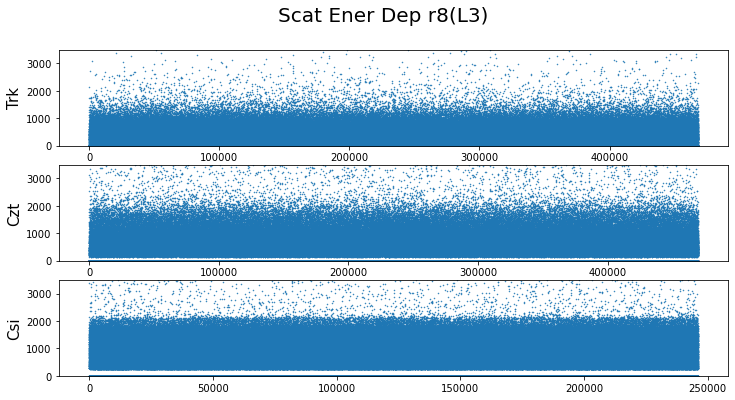

In [39]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

ttrk_id = trk_file['tracker/event_id'][...]
trk_id_ind = np.where(ttrk_id>0)
trk_id = ttrk_id[trk_id_ind]
Nrg_arr= Trk_nrg_sum_arr[trk_id_ind]

ax[0].scatter(np.arange(len(Nrg_arr)),Nrg_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_id=czt_file["eventdata/czt/event_id"][...]
czt_id_ind = np.where(tczt_id>0)
czt_id = tczt_id[czt_id_ind]
Nrg_arr =Czt_nrg_sum_arr[czt_id_ind]
ax[1].scatter(np.arange(len(Nrg_arr)),Nrg_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

tcsi_id = csi_file['EventID/EventID/values'][...]
csi_id_a= tcsi_id[np.where(tcsi_id>2E9)]
csi_id = csi_id_a[np.where(csi_id_a<2.15E9)]

Nrg_arr_a = Csi_nrg_sum_arr[np.where(tcsi_id>2E9)]
Nrg_arr = Nrg_arr_a[np.where(csi_id_a<2.15E9)]
ax[2].scatter(np.arange(len(Nrg_arr)),Nrg_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')
#ax[2].set_xlim(2000765017,)

for axs in ax:
    axs.set_ylim(0,max_ener)
    #axs.set_xlim(10,)
    #axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
#plt.xlim(xmin,xmax)
    
plt.rcParams["figure.figsize"] = [12, 6]    
#plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Scat Ener Dep r{run}(L3)', size=20)

plt.savefig(f"{fpath}L3_precud_gen_scatter_r{run}_{nrg}_b.jpeg")

### <font color='brown'> Plot: Scatter Tot dep 

## Event Time

### <font color='brown'> Plot: Event Time

In [101]:
czt_file['eventdata/czt'].keys()

<KeysViewHDF5 ['anode_digitime', 'anode_pulseheight', 'asic_temperature', 'cathode_digitime', 'cathode_pulseheight', 'energy', 'energy_unsupressed', 'event_id', 'event_time', 'pad_pulseheight', 'position', 'utc_corr']>

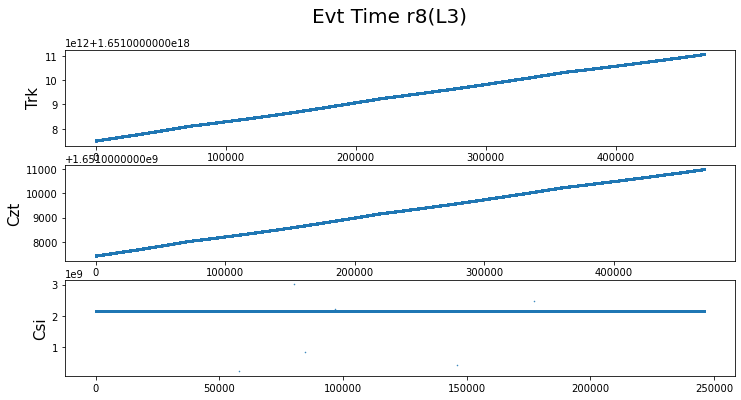

In [102]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

ttrk_time = trk_file['tracker/event_time'][...]
ax[0].scatter(np.arange(len(ttrk_time)),ttrk_time,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_time=czt_file["eventdata/czt/utc_corr"][...]
czt_time=tczt_time[np.where(tczt_time)]
ax[1].scatter(np.arange(len(czt_time)),czt_time,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

tcsi_time = csi_file['EventID/EventID/values'][...]
csi_time=tcsi_time[np.where(tcsi_time)]
ax[2].scatter(np.arange(len(csi_time)),csi_time,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.rcParams["figure.figsize"] = [12, 6]    

plt.suptitle(f'Evt Time r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_time_r{run}_{nrg}_t1.jpeg")

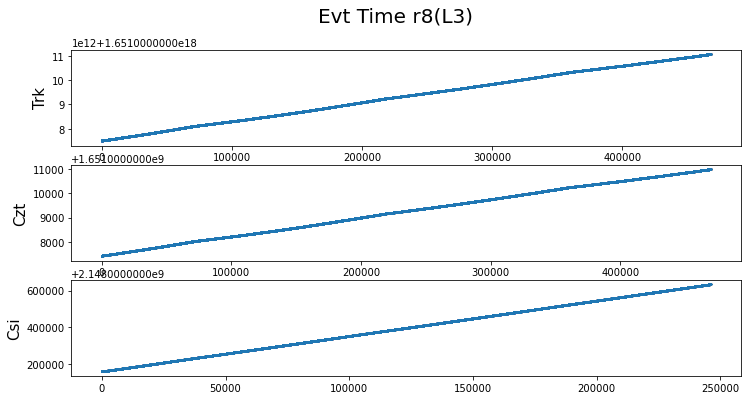

In [103]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

ttrk_time = trk_file['tracker/event_time'][...]
ax[0].scatter(np.arange(len(ttrk_time)),ttrk_time,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

tczt_time=czt_file["eventdata/czt/utc_corr"][...]
czt_time=tczt_time[np.where(tczt_time>0)]
ax[1].scatter(np.arange(len(czt_time)),czt_time,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

tcsi_time = csi_file['EventID/EventID/values'][...]
csi_time_a=tcsi_time[np.where(tcsi_time>2.0E9)]
csi_time= csi_time_a[np.where(csi_time_a<2.15E9)]
ax[2].scatter(np.arange(len(csi_time)),csi_time,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

plt.rcParams["figure.figsize"] = [12, 6]    

plt.suptitle(f'Evt Time r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_time_r{run}_{nrg}_t2.jpeg")

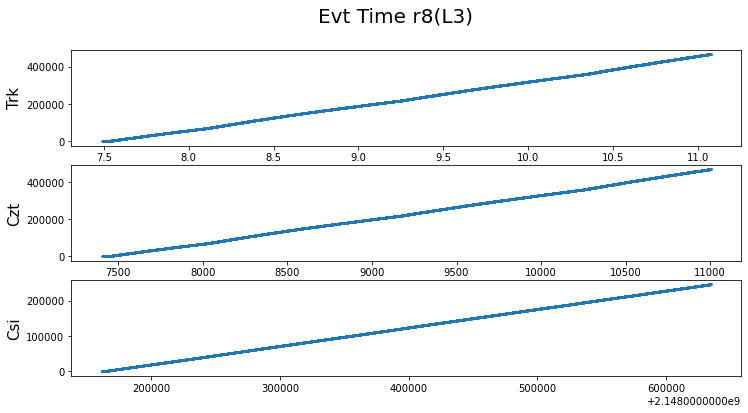

In [104]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

ttrk_time = trk_file['tracker/event_time'][...]
ax[0].scatter(ttrk_time,np.arange(len(ttrk_time)),marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

xmin_1 =min(ttrk_time)
xmax_1 =max(ttrk_time)

tczt_time=czt_file["eventdata/czt/utc_corr"][...]
czt_time=tczt_time[np.where(tczt_time>0)]
ax[1].scatter(czt_time,np.arange(len(czt_time)),marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')
xmin_2 = min(czt_time)
xmax_2 = max(czt_time)

tcsi_time = csi_file['EventID/EventID/values'][...]
csi_time_a=tcsi_time[np.where(tcsi_time>2.0E9)]
csi_time= csi_time_a[np.where(csi_time_a<2.15E9)]

ax[2].scatter(csi_time,np.arange(len(csi_time)),marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')
xmin_3 = min(csi_time)
xmax_3 = max(csi_time)


plt.rcParams["figure.figsize"] = [12, 6]    

plt.suptitle(f'Evt Time r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_gen_scatter_time_r{run}_{nrg}_t3.jpeg")

### <font color='navy'> Energy vs Event Time.

In [80]:
trk_time = trk_file['tracker/event_time'][...]
trk_time

array([1651020764861134172, 1651020765031445191, 1651020765062170145, ...,
       1651024355030345574, 1651024355031489730, 1651024355042370244],
      dtype=uint64)

In [81]:
czt_file['eventdata/czt'].keys()

<KeysViewHDF5 ['anode_digitime', 'anode_pulseheight', 'asic_temperature', 'cathode_digitime', 'cathode_pulseheight', 'energy', 'energy_unsupressed', 'event_id', 'event_time', 'pad_pulseheight', 'position', 'utc_corr']>

In [82]:
czt_time = czt_file['eventdata/czt/utc_corr'][...]
czt_time

array([1.65102068e+09, 1.65102068e+09, 1.65102068e+09, ...,
       1.65102428e+09, 1.65102428e+09, 1.65102428e+09])

In [83]:
csi_time = csi_file['time/UTC/values'][...]
csi_time

array([1.65102062e+18, 1.65102062e+18, 1.65102062e+18, ...,
       1.65102422e+18, 1.65102422e+18, 1.65102422e+18])

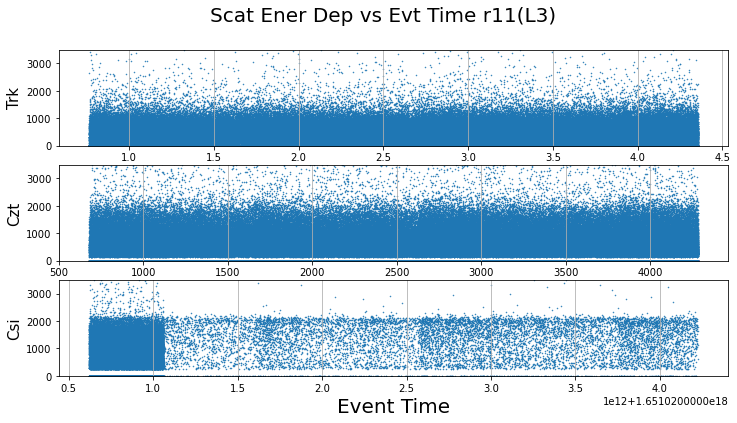

In [84]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

ax[0].scatter(trk_time,Trk_nrg_sum_arr/2.0,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

ax[1].scatter(czt_time,Czt_nrg_sum_arr,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

ax[2].scatter(csi_time,Csi_nrg_sum_arr,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    axs.set_ylim(0,max_ener)
    axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
    
plt.rcParams["figure.figsize"] = [12, 6]    

plt.xlabel('Event Time',fontsize='20')
plt.suptitle(f'Scat Ener Dep vs Evt Time r{run}(L3)', size=20)

plt.savefig(f"{fpath}L3_precud_gen_scatter_r{run}_{nrg}_c.jpeg")

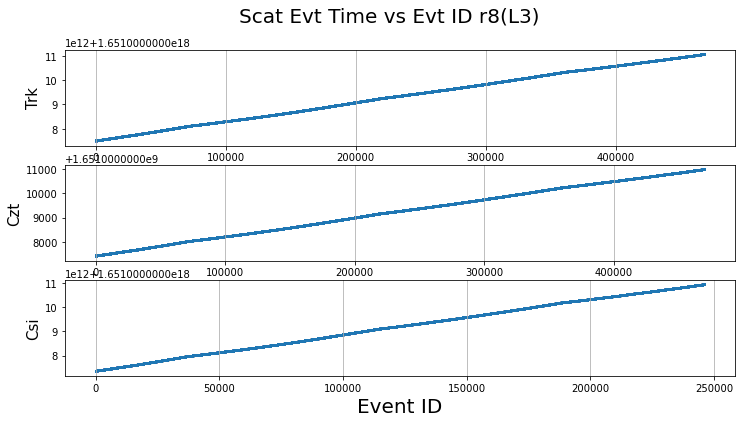

In [95]:
plt.rcParams["figure.figsize"] = [12, 6]
max_ener = max_nrg_sel

fig, ax =  plt.subplots(3)

ax[0].scatter(np.arange(trk_nevt),trk_time,marker='.',s=1)
ax[0].set_ylabel('Trk', fontsize='15')

ax[1].scatter(np.arange(czt_nevt),czt_time,marker='.',s=1)
ax[1].set_ylabel('Czt', fontsize='15')

ax[2].scatter(np.arange(csi_nevt),csi_time,marker='.',s=1)
ax[2].set_ylabel('Csi', fontsize='15')

for axs in ax:
    #axs.set_ylim(100000,)
    axs.grid(axis = 'x')    
    #axs.set_xticks(np.arange(0,max(xvar),20000))
    
plt.rcParams["figure.figsize"] = [12, 6]    

plt.xlabel('Event ID',fontsize='20')
plt.suptitle(f'Scat Evt Time vs Evt ID r{run}(L3)', size=20)
plt.savefig(f"{fpath}L3_precud_EvtTime_EvtID_r{run}_{nrg}.jpeg")

# Testing

## <font color='red'>Check Common Event ID

In [50]:
test_arr1 = np.array([ 1, 3, 5, 7, 9,11,13,15,17,19,21,23,25,27,29])
test_arr2 = np.array([ 1, 2, 3,  7,8, 11, 13, 19,20,26,27, 30 ])
test_arr3 = np.array([ 1, 2, 3, 4, 5, 7,8,11, 13,17,23,27])

In [51]:
ind1, ind2, ind3 = get_common_index(test_arr1, test_arr2, test_arr3)

In [52]:
ind1, ind2, ind3

(array([ 0,  1,  3,  5,  6, 13]),
 array([ 0,  2,  3,  5,  6, 10]),
 array([ 0,  2,  5,  7,  8, 11]))

In [53]:
test_arr1[ind1]

array([ 1,  3,  7, 11, 13, 27])

In [54]:
test_arr2[ind2]

array([ 1,  3,  7, 11, 13, 27])

In [55]:
test_arr3[ind3]

array([ 1,  3,  7, 11, 13, 27])

## Misc

In [3]:
for i in range(10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [4]:
for i in range(2,10):
    print(i)

2
3
4
5
6
7
8
9


In [6]:
for i in range(2,10,2):
    print(i)

2
4
6
8


# <font color='blue'>Generate PDFs
   
> Generate 1 PDF with all the plots in the end to summarize it in 1 file.